<a href="https://colab.research.google.com/github/kmsekgothe/load-shortfall-regression-predict-api/blob/master/KaggleNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 12 - Advanced Classification Predict

© Explore Data Science Academy

---

### Introduction: 
---

### Predict Overview




<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

In this section we import the necessary libraries needed for Data Analysis, Data Manipulation, Data Visualization and Model Building.

In [5]:
# libraries needed for Data Analysis and  Data Manipulation
import numpy as np # used to evaluate arrays
import pandas as pd # used to create and utilise tabular data ie Pandas DataFrame

# libraries to be used for Data Visualization
import matplotlib.pyplot as plt # used to visualize data
import seaborn as sns # used to visualize data
from matplotlib import rc
from scipy import sparse
%matplotlib inline

# Libraries for data preparation and model building
import sklearn
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
import string
import requests
from time import sleep
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import log_loss
from sklearn.utils import resample
from sklearn.metrics import f1_score
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import feature_selection
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

# Suppress cell warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# !pip install wordcloud
# !pip install mlxtend  

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Loading of Test and Train datasets. 
- Concatenate the datasets to ensure Data Engineering is done only once (for convenience). 
- Dataframes will then be split later on when needed.

In [7]:
df = pd.read_csv('train.csv') # load the data
df_test = pd.read_csv('test_with_no_labels.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Perform basic analysis on the dataframe.

In [8]:
# Basic Train Analysis

df.shape # train DataFrame has 15 819 rows and 3 columns

(15819, 3)

In [9]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  
0   625221  
1   126103  
2   698562  
3   573736  
4   466954

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [11]:
df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

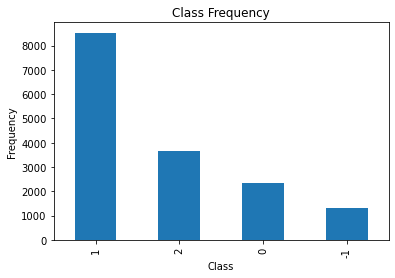

In [12]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [13]:
unique, counts = np.unique(df['sentiment'], return_counts=True)
unique_counts_dict = {'Unique Count':
             {
                 "Class -1": counts[0],
                "Class 0": counts[1],
              "Class 1": counts[2],
              "Class 2": counts[3]
              }
             }
unique_count = pd.DataFrame(data=unique_counts_dict)
unique_count.sort_values(by='Unique Count', ascending=False)

Unique Count
Class 1           8530
Class 2           3640
Class 0           2353
Class -1          1296

Class Description:

- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change

Note the imbalance here: there are over 8000 observations in class 1 and only 1296 observations in class -1.

In [14]:
# Basic Test Analysis

df_test.shape # test DataFrame has 10 546 rows and 2 columns

(10546, 2)

In [15]:
df_test.head()

message  \
0                    Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq   
1         Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj   
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4                                                             RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican   

   tweetid  
0   169760  
1    35326  
2   224985  
3   476263  
4   872928

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


<a id="three"></a>
## 3. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Data Cleaning and Formatting
 

Before we can do **Exploratory Data Analysis** (EDA) in section 4, we need to ensure that our data is in the correct format that can actually be used.

In [17]:
# Better view of what's in the dataset
for i, row in df.iterrows():
    print(i)
    print(row)
    print("\n")

0
sentiment                                                                                                                                               1
message      PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
tweetid                                                                                                                                            625221
Name: 0, dtype: object


1
sentiment                                                                 1
message      It's not like we lack evidence of anthropogenic global warming
tweetid                                                              126103
Name: 1, dtype: object


2
sentiment                                                                                                                                               2
message      RT @RawStory: Researchers say we have three years to act on climate change before it’s 

Name: 313, dtype: object


314
sentiment                                                                                                                                                1
message      RT @BernieSanders: 'The concept of global warming was created by and for the Chinese in order to make U.S. manufacturing non-competitiÃ¢â‚¬Â¦
tweetid                                                                                                                                             598816
Name: 314, dtype: object


315
sentiment                                                                                                                                           1
message      97 per cent of climate scientists believe climate change is real...#DonaldTrump thinks it's a Chinese hoax! Sad! https://t.co/btNlSthTog
tweetid                                                                                                                                        169522
Name: 315, dtype: objec

582
sentiment                                                                                                                                                     0
message      RT @cat_beltane: it was cool when 0 of the 3 US presidential debates featured any questions whatsoever about climate change https://t.co/gKÃ¢â‚¬Â¦
tweetid                                                                                                                                                  671187
Name: 582, dtype: object


583
sentiment                                                                                                         2
message      RT @ClimateCentral: Every Trump cabinet nominee's position on climate change → https://t.co/5TQchTUI3e
tweetid                                                                                                      308147
Name: 583, dtype: object


584
sentiment                                                                                                 

Name: 857, dtype: object


858
sentiment                                                                                                                                                1
message      RT @chinasolar: As Earth gets hotter, scientists break new ground linking climate change to extreme weather \nhttps://t.co/s1KBwZ8ob5 #scien…
tweetid                                                                                                                                             155751
Name: 858, dtype: object


859
sentiment                                                                                                                                               0
message      RT @cnazmul78: Starting of synthesizing 41 reports on community climate change projects of PKSF @SaleemulHuq @Gobeshona @ICCCAD https://t.c…
tweetid                                                                                                                                            392761
Name: 859, 



1116
sentiment                                                                                                                                                     1
message      RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
tweetid                                                                                                                                                  964717
Name: 1116, dtype: object


1117
sentiment                                                                                                                                               2
message      Obama writes: We have long known that the urgency of acting to mitigate climate change is real and cannot be ignored https://t.co/bOzJR8YdHG
tweetid                                                                                                                                            419368
Name: 1117, dtype:

Name: 1419, dtype: object


1420
sentiment                                                                                                                                  2
message      RT @mattiwaananen: Donald Trump wants to shut off an orbiting space camera that monitors climate change https://t.co/HNYWkxkemn
tweetid                                                                                                                               991447
Name: 1420, dtype: object


1421
sentiment                                                                                                                     2
message      RT @PostOpinions: Reader Anne Hubbard on climate change: 'These are not partisan issues. These are human issues.'…
tweetid                                                                                                                  539683
Name: 1421, dtype: object


1422
sentiment                                                                                     

1748
sentiment                                                                                                                               1
message      @HOOAH69 https://t.co/jpIXhK89ne His cabinet choices are idiots, climate change deniers, and bigots. https://t.co/jpIXhK89ne
tweetid                                                                                                                             45081
Name: 1748, dtype: object


1749
sentiment                                                                                                                                 -1
message      We all pray that Ivanka will stopping pushing the global warming scam on her father. \n@realDonaldTrump https://t.co/6cvtw0OulO
tweetid                                                                                                                               128989
Name: 1749, dtype: object


1750
sentiment                                                                                   

2077
sentiment                                                                                                                                              -1
message      @AbrahamEngel1 @jules_su @realDonaldTrump Me too. You know global warming is a hoax but with all these snowflakes m… https://t.co/ZCYVq9i2sq
tweetid                                                                                                                                            957668
Name: 2077, dtype: object


2078
sentiment                                                                                                                                    1
message      RT dna '#MustRead: Fighting climate change in an unequal world https://t.co/M360nyeseO #EarthDayWithDNA… https://t.co/l6N648ySCL'
tweetid                                                                                                                                 911763
Name: 2078, dtype: object


2079
sentiment                             

Name: 2374, dtype: object


2375
sentiment                                                                                                                          2
message      RT @CNN: Jill Stein: Al Gore needs to 'step up' in climate change fight https://t.co/ryFh7HOWw3 https://t.co/L4Oc7Kjr5D
tweetid                                                                                                                       372295
Name: 2375, dtype: object


2376
sentiment                                                                                                                                             1
message      RT @SenSanders: We have a president-elect who doesn't believe in climate change. Millions of people are going to have to say: Mr. TÃ¢â‚¬Â¦
tweetid                                                                                                                                          354672
Name: 2376, dtype: object


2377
sentiment                                     

sentiment                                                                                                                                               1
message      RT @yayitsrob: Thanks to climate change, Harvey “is apt to be more intense, … longer-lasting, and with much heavier rainfalls”: https://t.c…
tweetid                                                                                                                                            320313
Name: 2633, dtype: object


2634
sentiment                                                                                                                                                    1
message      RT @Ashley_L_Grapes: #trump, you promised to represent the people, and we believe in climate change. Please rethink your pick for EPA! OurÃ¢â‚¬Â¦
tweetid                                                                                                                                                 143528
Name: 2634, dtype: object






2920
sentiment                                                                                                                                                 -1
message      C'mon,We need to focus on important things this election like non offensive Halloween costumes &amp; global wa...climate change' -actors #Trump
tweetid                                                                                                                                               258590
Name: 2920, dtype: object


2921
sentiment                                                                                                                   2
message      RT @GuardianUS: USDA has begun censoring use of the term 'climate change', emails reveal https://t.co/BYsSUQuQHH
tweetid                                                                                                                380528
Name: 2921, dtype: object


2922
sentiment                                                                     

Name: 3226, dtype: object


3227
sentiment                                                                                                -1
message      RT @Thomas_Hern1: You might be a liberal if you'd rather fight climate change instead of ISIS.
tweetid                                                                                              123589
Name: 3227, dtype: object


3228
sentiment                                                                                                                                             0
message      RT @ReaderFaves: RT @AMZ0NE  A SciFi author explains why we won't solve global warming. Read the blog. ▶https://t.co/balPA9uGdt #amreading
tweetid                                                                                                                                          280934
Name: 3228, dtype: object


3229
sentiment                                                                                                           1
mes

Name: 3540, dtype: object


3541
sentiment                                                                                                                                                     1
message      RT @NatGeoChannel: Watch #BeforeTheFlood right here, as @LeoDiCaprio travels the world to tackle climate change https://t.co/LkDehj3tNn httÃ¢â‚¬Â¦
tweetid                                                                                                                                                  544339
Name: 3541, dtype: object


3542
sentiment                                                                                                                             1
message      RT @wef: The #US had to relocate an entire town because of #climate change https://t.co/oyIFqVN6Pk https://t.co/5aBnhWCeFL
tweetid                                                                                                                          467945
Name: 3542, dtype: object


3543
sentiment    

Name: 3849, dtype: object


3850
sentiment                                                                                       1
message      5 ways China is becoming the global leader on climate change https://t.co/tvny16Eg6t
tweetid                                                                                    824630
Name: 3850, dtype: object


3851
sentiment                                                                                                                                      1
message      RT @ChiVeganMania: We have teamed up with @ffacoalition for @CHIScienceMarch! Fight climate change with diet change. #ScienceMarch…
tweetid                                                                                                                                   268107
Name: 3851, dtype: object


3852
sentiment                                                                                                                                                    0
message      

Name: 4167, dtype: object


4168
sentiment                                                                                                                                         -1
message      @verge remember when you liberals called it global warming. And then the winters were the coldest ever so you called it climate change?
tweetid                                                                                                                                       555623
Name: 4168, dtype: object


4169
sentiment                                                                                                                                               1
message      RT @BernieSanders: Congratulations to all those participating in the #climatemarch. We will fight Trump who thinks climate change is a 'hoa…
tweetid                                                                                                                                             14658
Name: 4169, dtype: object


4467
sentiment                                                                                   2
message      UN climate change agency reacts cautiously to Trump plan https://t.co/5f1ZvWLKIN
tweetid                                                                                446558
Name: 4467, dtype: object


4468
sentiment                                                                                                                                                     1
message      RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
tweetid                                                                                                                                                  647465
Name: 4468, dtype: object


4469
sentiment                                                                                                         1
message      RT @first_edward: @washingtonpost can

Name: 4761, dtype: object


4762
sentiment                                                                                                                                    1
message      RT @2footshaft: @jakemfc1990 @Brett73 @LilianGreenwood Didn't even put it in the recycling bin. 7 year old climate change denier.
tweetid                                                                                                                                 687511
Name: 4762, dtype: object


4763
sentiment                                                                                                                                             0
message      RT @StephenMangan: Please don't worry about climate change. Congressman Tim Wahlberg has a plan. https://t.co/51o2KEXZDy (via @JeffreyKla…
tweetid                                                                                                                                          952660
Name: 4763, dtype: object


4764
sentiment       

5018
sentiment                                                                                                                                                 1
message      RT @Kon__K: He's a self - proclaimed racist, misogynist, climate change denier, homophobe &amp; fascist. \n\nBut she's a woman. #ElectionNight
tweetid                                                                                                                                               50559
Name: 5018, dtype: object


5019
sentiment                                                                                                                                            2
message      Adapting to climate change means adapting to Trump – here's how | Dr Aditya V Bahadur: Donald Trump’s scepticism… https://t.co/YVsl0bGC3z
tweetid                                                                                                                                         941337
Name: 5019, dtype: object


5020
sentimen

Name: 5332, dtype: object


5333
sentiment                                                                                                                        1
message      RT @newsthump: NEWS! Theresa May appeases DUP’s climate change deniers by handing environment to incompetent bellend…
tweetid                                                                                                                     309958
Name: 5333, dtype: object


5334
sentiment                                                                                                                 1
message      @chrislhayes @AtticusGF Example A of never convincing religious conservatives of the reality of climate change
tweetid                                                                                                              838806
Name: 5334, dtype: object


5335
sentiment                                                                                                            0
message      RT @

Name: 5627, dtype: object


5628
sentiment                                                                                                                                                      1
message      RT @SenSanders: On virtually every major issue Ã¢â‚¬â€ raising the minimum wage, climate change, pay equity for women Ã¢â‚¬â€ we are the majority
tweetid                                                                                                                                                   518883
Name: 5628, dtype: object


5629
sentiment                                                                                                                    1
message      @MihirBijur those days food was aplenty. No climate change, no drought/famine. Farmers weren't committing suicide
tweetid                                                                                                                 215817
Name: 5629, dtype: object


5630
sentiment                            


5949
sentiment                                                                                                                      2
message      RT @ACSimonelli: In rebuke to Trump policy, GE chief says ‘climate change is real’ https://t.co/FhdcOschZv via @WSJ
tweetid                                                                                                                   917839
Name: 5949, dtype: object


5950
sentiment                                                                                                                                                     0
message      RT @PoliticsScot: I love that they're going ahead with the Paris climate change agreement meetings. Like holding a birthday party for someoÃ¢â‚¬Â¦
tweetid                                                                                                                                                  238349
Name: 5950, dtype: object


5951
sentiment                                                    

Name: 6253, dtype: object


6254
sentiment                                                                                                                                              1
message      RT @GhostPanther: Bye bye bank regulations.\nBye bye dealing with climate change.\nBye bye health care.\nBye bye diplomacy.\n#electionnight
tweetid                                                                                                                                           857831
Name: 6254, dtype: object


6255
sentiment                                                                                                                                           -1
message      RT @shelliecorreia: The term 'climate change', was coined to give them a free pass on the climate.  Whether it is hot or cold, it is al… 
tweetid                                                                                                                                         351267
Name: 6255, dtype: obj



6579
sentiment                                                                                                                                        1
message      Stern showed economic costs of climate change will outweigh economic costs of mitigation leading to more impetus for climate action 1
tweetid                                                                                                                                     893698
Name: 6579, dtype: object


6580
sentiment                                                                                                                                              1
message      Donald Trump's 'insane' climate change policy will destroy m... https://t.co/dnwtHwrn1N #Cleantech #Environment #Renewables via @SydesJokes
tweetid                                                                                                                                           220718
Name: 6580, dtype: object


6581
sentiment                  

Name: 6869, dtype: object


6870
sentiment                                                                                                                            1
message      RT @AMZ0NE  A SciFi author explains why we won't solve global warming. Read the blog. ▶https://t.co/ZGQjLT5DHn #amreading
tweetid                                                                                                                         729705
Name: 6870, dtype: object


6871
sentiment                                                                                                                              2
message      RT @WorldfNature: Trump budget chief on climate change: 'We consider that to be a waste of your money' - CNN International…
tweetid                                                                                                                            70780
Name: 6871, dtype: object


6872
sentiment                                                                            

Name: 7192, dtype: object


7193
sentiment                                                                                                                                               1
message      RT @davidsirota: This makes a strong case that every other political issue is tiny in comparison to the issue of climate change https://t.c…
tweetid                                                                                                                                            543267
Name: 7193, dtype: object


7194
sentiment                                                                                                             1
message      A2: A good example is how climate change has made the design industry more eco-conscious 2/2 #ModernMonday
tweetid                                                                                                           26454
Name: 7194, dtype: object


7195
sentiment                                                                      

Name: 7484, dtype: object


7485
sentiment                                                                                               2
message      G7 leaders blame Trump for failure to reach climate change agreement https://t.co/ehPRpWHAl7
tweetid                                                                                            274986
Name: 7485, dtype: object


7486
sentiment                                                                                                                      1
message      RT @citizensclimate: Want Congress to take action on climate change? They need to hear from you. Make those calls!…
tweetid                                                                                                                   941491
Name: 7486, dtype: object


7487
sentiment                                                                                                                        2
message      Nike, Google, and other companies take down Trump ov

Name: 7750, dtype: object


7751
sentiment                                                                                                                                               2
message      RT @AnikaMolesworth: From Asia to Australia, farmers are on the climate change frontline https://t.co/ZkG8iEEPsw @CrawfordFund @FAotC @ACIA…
tweetid                                                                                                                                            338375
Name: 7751, dtype: object


7752
sentiment                                                                                                                            1
message      It is difficult to assess the total damage of climate change and other environmental stresses to the Antarctic ecosystem,
tweetid                                                                                                                         347110
Name: 7752, dtype: object


7753
sentiment                         

Name: 8052, dtype: object


8053
sentiment                                                                                                                   1
message      RT @Salon: When China calls out Donald Trump on climate change, you know itÃ¢â‚¬â„¢s bad https://t.co/qx1Xep7k82
tweetid                                                                                                                694337
Name: 8053, dtype: object


8054
sentiment                                                                                                                                          1
message      RT @DesiJed: Maybe Trump would care more about #ParisClimateDeal if Barron thought global warming was as real as the beheading picture.
tweetid                                                                                                                                       943127
Name: 8054, dtype: object


8055
sentiment                                                                   

Name: 8363, dtype: object


8364
sentiment                                                      1
message      RT @aldairmaruz: global warming is really happening
tweetid                                                   353514
Name: 8364, dtype: object


8365
sentiment                                                                                    2
message      #Europe: Paris climate change agreement comes into effect https://t.co/EI4vqxdxBr
tweetid                                                                                 394434
Name: 8365, dtype: object


8366
sentiment                                                                                                                                               2
message      RT @Oceanwire: Some kelp forests show surprising resistance to #climate change, but troubling https://t.co/idwIGCmuPo MT @Oceana https://t.…
tweetid                                                                                                          

8637
sentiment                                                                                                                                               1
message      RT @Vegalteno: Instead of funding 4 Meals on Wheels, breast cancer research or climate change actions, liar @realDonaldTrump will spend $4b…
tweetid                                                                                                                                            965893
Name: 8637, dtype: object


8638
sentiment                                                                0
message      being a goth and having to live thru global warming Suuuuucks
tweetid                                                              34004
Name: 8638, dtype: object


8639
sentiment                                                                                                                                              1
message      RT @Scientists4EU: Strong message to US climate change &amp; renewable energ

Name: 8974, dtype: object


8975
sentiment                                                                 1
message      RT @LonGreenParty: And climate change. https://t.co/Wic7yunL38
tweetid                                                              254382
Name: 8975, dtype: object


8976
sentiment                                                                                                                                               0
message      UniversityofNairobi(UoN)students picking ACTS, ICCA, CDNK publications: climate change,  East Africa GreenClimateFu… https://t.co/IQnKMLbZ8P
tweetid                                                                                                                                            129281
Name: 8976, dtype: object


8977
sentiment                                                                                                                             2
message      RT @WorldfNature: Nevada climate change expert Redmond remembe

9266
sentiment                                                                         0
message      RT @DebraMessing: #AlGore &amp; climate change https://t.co/C5POR7dDnJ
tweetid                                                                      713988
Name: 9266, dtype: object


9267
sentiment                                                                                                                                               1
message      RT @WIRED: The $280 billion a year coastal cities are spending on climate change is propelling some ingenious engineering https://t.co/2ld5…
tweetid                                                                                                                                            468512
Name: 9267, dtype: object


9268
sentiment                                                                                                                              2
message      RT @BelugaSolar: Donald Trump actually has very little control ov

9555
sentiment                                                                 0
message      Trump really doesn't think global warming is real man Ã°Å¸ËœÂ­
tweetid                                                               26747
Name: 9555, dtype: object


9556
sentiment                                                                                                                                        1
message      RT @AyyThereDelilah: Florida's dumb ass voted Trump now y'all gone be underwater because Republicans don't believe in climate change.
tweetid                                                                                                                                     147646
Name: 9556, dtype: object


9557
sentiment                                                                                                                                        2
message      RT @nowthisnews: Donald Trump is standing down from the fight against climate change - but Angela Me

Name: 9863, dtype: object


9864
sentiment                                                                                                                                      2
message      Devastating global warming is inevitable due to inaction of international community, says leading economist https://t.co/pyhjQDbFa6
tweetid                                                                                                                                   818291
Name: 9864, dtype: object


9865
sentiment                                                                         -1
message      @nmilne50 I bet you believe in the lefts man made global warming theory
tweetid                                                                       710907
Name: 9865, dtype: object


9866
sentiment                                                                                                                                               1
message      RT @ClimateCentral: Here's how climate chang

Name: 10164, dtype: object


10165
sentiment                                                                                                                                                    -1
message      RT @CounterMoonbat: The people who predicted parts of Manhattan would be underwater by 2008 due to climate change are concerned about 'fakeÃ¢â‚¬Â¦
tweetid                                                                                                                                                  626872
Name: 10165, dtype: object


10166
sentiment                                                                                                                                                     1
message      RT @MotherJones: Look at all the climate change deniers vying for jobs in the Trump administration https://t.co/w1uov8VE5u https://t.co/xJaÃ¢â‚¬Â¦
tweetid                                                                                                                           

Name: 10429, dtype: object


10430
sentiment                                                                                                                                                -1
message      RT @spark_show: Is this her answer to every question ever? She's so useless. \n\nHuman caused climate change is the conspiracy. #ableg https:…
tweetid                                                                                                                                              233634
Name: 10430, dtype: object


10431
sentiment                                                                                                                                            1
message      RT @Ursalette: @Kalaax008 @DrDavidDuke Trump's absolute ignorance of global affairs, trade repercussions, and climate change deniaÃ¢â‚¬Â¦
tweetid                                                                                                                                         900748
Name: 104

Name: 10722, dtype: object


10723
sentiment                                                                                              2
message      On climate change, angels and demons are battling over Trump’s soul https://t.co/SaaSlM1GzC
tweetid                                                                                           669558
Name: 10723, dtype: object


10724
sentiment                                                                                                        2
message      https://t.co/IJGZosVDJz Exxon to Trump: Don't ditch Paris climate change deal https://t.co/FgJW4riI77
tweetid                                                                                                     264008
Name: 10724, dtype: object


10725
sentiment                                                                                                 1
message      Through climate change denial, we're ceding global leadership to China https://t.co/QEOWeA6mnF
tweetid            

Name: 11044, dtype: object


11045
sentiment                                                                                                                                                   1
message      RT @SaysHummingbird: Unbelievable.\n\n'The Trump-Putin meeting took place at same time other world leaders were discussing climate change'\n\nh…
tweetid                                                                                                                                                200686
Name: 11045, dtype: object


11046
sentiment                                                                                                                                                     2
message      RT @cctvnewsafrica: Coming up on #AfricaLive with @BmarshallCCTV World leaders declare climate change action plan unstoppable https://t.co/Ã¢â‚¬Â¦
tweetid                                                                                                                                 

11315
sentiment                                                                                                                                                     0
message      RT @PantheraCats: Snow leopards live high up in the mountains of central Asia. Will climate change affect them? More from @onEarthMag httpsÃ¢â‚¬Â¦
tweetid                                                                                                                                                  556289
Name: 11315, dtype: object


11316
sentiment                                                                                                                              2
message      What does Africa need to tackle #climate change? - https://t.co/7X7M30KLQ5: Al Jazeera https://t.co/7N9P9rUoE2 #environment
tweetid                                                                                                                           658862
Name: 11316, dtype: object


11317
sentiment                        

Name: 11597, dtype: object


11598
sentiment                                                                           1
message      can I sue trump for trying to kill us via pollution and global warming??
tweetid                                                                        673652
Name: 11598, dtype: object


11599
sentiment                                                                                                                                       1
message      RT @AbsLawson: I count, mark, and track alligators to predict how their populations will respond to climate change and harvest pre… 
tweetid                                                                                                                                    288491
Name: 11599, dtype: object


11600
sentiment                                                                                                                                               2
message      U.S. President Donald Trump sign

11871
sentiment                                                                                                 2
message      The impact of climate change on the Great Barrier Reef - The Economist https://t.co/1jQM83cFwZ
tweetid                                                                                              134675
Name: 11871, dtype: object


11872
sentiment                                                                                                                   0
message      He saw a nuclear blast at 9, then spent his life opposing nuclear war and climate change https://t.co/jV5cwudM7q
tweetid                                                                                                                622190
Name: 11872, dtype: object


11873
sentiment                                                                                                                                               1
message      RT @GreenPartyNI: The Green Party are proud to support 

Name: 12151, dtype: object


12152
sentiment                                                                                                                                           1
message      RT @mzjacobson: Model v @NASA data proves humans have caused geographically-varying global warming-Model shows by cause&amp;effect what…
tweetid                                                                                                                                        648222
Name: 12152, dtype: object


12153
sentiment                                                                                        1
message      Project Drawdown brings hope on global warming @kline_maureen https://t.co/lbbWCF85Ni
tweetid                                                                                      95517
Name: 12153, dtype: object


12154
sentiment                                                                                                                                           

12499
sentiment                                                                                                                                     1
message      RT @ClimateReality: #ClimateFact: When we burn fossil fuels, we’re driving climate change. Learn to #LeadOnClimate in Pittsburgh:…
tweetid                                                                                                                                  502759
Name: 12499, dtype: object


12500
sentiment                                                                                                                                          1
message      How to green the world's deserts and reverse climate change | Allan Savory https://t.co/fRt7oQM4yY via @YouTube\n#desert #mimic #nature
tweetid                                                                                                                                       949098
Name: 12500, dtype: object


12501
sentiment                                    

sentiment                                                                                                                                               1
message      RT @larsonchristina: Our Automated Future - and robot jobs: @ElizKolbert tackles topic only slightly less unsettling than climate change  h…
tweetid                                                                                                                                            782818
Name: 12770, dtype: object


12771
sentiment                                                                                                                        2
message      RT @climatehawk1: New findings show how #climate change influences India’s farmer suicides | @blkahn @ClimateCentral…
tweetid                                                                                                                     874376
Name: 12771, dtype: object


12772
sentiment                                                                  

13075
sentiment                                                                                                                             2
message      China to Trump: We didn't make up global warming: China is reminding the president-elect ofÃ¢â‚¬Â¦ https://t.co/1RSAqKvqEg
tweetid                                                                                                                          689178
Name: 13075, dtype: object


13076
sentiment                                                                                                                                          1
message      Republicans held a fake inquiry on climate change to attack the only credible scientist in the room - The Verge https://t.co/03szjHo5n2
tweetid                                                                                                                                       281901
Name: 13076, dtype: object


13077
sentiment                                                            

13408
sentiment                                                                                                                                                     2
message      RT @thinkprogress: Brace yourself for a bitterly cold winter, as climate change shifts the polar vortex https://t.co/TKrnPz6LIx https://t.cÃ¢â‚¬Â¦
tweetid                                                                                                                                                  695107
Name: 13408, dtype: object


13409
sentiment                                                                                                                                                     1
message      RT @ddlovato: #IVotedBecause I believe in equality, we need comprehensive immigration reform, I am pro-choice and global warming IS real. #Ã¢â‚¬Â¦
tweetid                                                                                                                                                  625188

13672
sentiment                                                                                                                                                     1
message      RT @SethMacFarlane: HRC proposes installing half a billion solar panels by the end of her first term. Trump thinks climate change is a hoaxÃ¢â‚¬Â¦
tweetid                                                                                                                                                  656455
Name: 13672, dtype: object


13673
sentiment                                                                                                                      1
message      RT @LisaBloom: To not have climate change in this headline is to abrogate the duty of truth https://t.co/hX6gWYnRnb
tweetid                                                                                                                   409117
Name: 13673, dtype: object


13674
sentiment                                                

Name: 13963, dtype: object


13964
sentiment                                                                                                                   2
message      According to UN, 1 in 30 people could be displaced by climate change by mid century.\n\n https://t.co/fvY5ekbhE0
tweetid                                                                                                                740427
Name: 13964, dtype: object


13965
sentiment                                                                                                                                             1
message      RT @Fusion: America is about to become the only country in the world with a leader who doesnÃ¢â‚¬â„¢t think global warming is real.Ã¢â‚¬Â¦
tweetid                                                                                                                                          818957
Name: 13965, dtype: object


13966
sentiment                                                    

Name: 14260, dtype: object


14261
sentiment                                                                                                               2
message      Michael Bloomberg wrote a thing:  How to make a profit from defeating climate change https://t.co/O6td1li4vO
tweetid                                                                                                            962919
Name: 14261, dtype: object


14262
sentiment                                                                                                                                                     0
message      But big questions remain on #Trump foreign policy, climate change agreement, wall with Mexico, Iran Deal, NATO, IraÃ¢â‚¬Â¦ https://t.co/1ZVsoOuiaI
tweetid                                                                                                                                                  106312
Name: 14262, dtype: object


14263
sentiment                                        

14574
sentiment                                                                                                                                                -1
message      @WorldfNature It is complete madness to think humans can alter climate change, King Canute tried, &amp; look what happened to him. GLUG, GLUG.
tweetid                                                                                                                                              937376
Name: 14574, dtype: object


14575
sentiment                                                                                                        1
message      RT @mashable: Possibly the most beautiful and distinct sign of climate change https://t.co/u0KdiMwHk8
tweetid                                                                                                     237234
Name: 14575, dtype: object


14576
sentiment                                                                                                      



14874
sentiment                                                                                                                                         1
message      RT @MerlinYYC: China will soon trump America: The country is now the global leader in climate change reform\n\nhttps://t.co/bySqI7xY9s
tweetid                                                                                                                                      885520
Name: 14874, dtype: object


14875
sentiment                                                                                                                          2
message      RT @extinctsymbol: Experts fear ‘quiet springs’ as songbirds can’t keep up with climate change: https://t.co/QqQ9UFHcI4
tweetid                                                                                                                          835
Name: 14875, dtype: object


14876
sentiment                                                                      

Name: 15164, dtype: object


15165
sentiment                                                                                                                                        -1
message      RT @SteveSGoddard: Forty years ago, the @nytimes blamed African drought and famine on global cooling. Now they blame global warming.… 
tweetid                                                                                                                                      977942
Name: 15165, dtype: object


15166
sentiment                                                                                                                                               2
message      RT @BBCBreaking: President Donald Trump signs executive order rolling back Obama-era rules aimed at tackling global warming https://t.co/dp…
tweetid                                                                                                                                            708600
Name: 15166, dtype: obje

15448
sentiment                                                                                                                                                1
message      i can't believe i am saying this , but ISIS plzzz kill trump\nor he will kill us all , he doesn't belive in #climate change\nplzz do us a fav
tweetid                                                                                                                                             931075
Name: 15448, dtype: object


15449
sentiment                                                                                                                                      1
message      Installed yesterday, monitoring today...our global warming greenhouse study had begun! #STEM @WaukeshaSTEM… https://t.co/IvwsEf9ClQ
tweetid                                                                                                                                   554247
Name: 15449, dtype: object


15450
sentiment               

15740
sentiment                                                                                                                   0
message      Looks like #socialmedia is no fan of #EPA head #ScottPruitt's position on climate change https://t.co/r3RvPJhAMw
tweetid                                                                                                                544462
Name: 15740, dtype: object


15741
sentiment                                                                                                                                                1
message      RT @BernieSanders: 'The concept of global warming was created by and for the Chinese in order to make U.S. manufacturing non-competitiÃ¢â‚¬Â¦
tweetid                                                                                                                                             569493
Name: 15741, dtype: object


15742
sentiment                                                                        

In [18]:
# Create new column, data = linkedembedded urls from message column

#def extract_urls(string):
#    url_pattern = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
#    url = re.findall(url_pattern, string)      
#    return str([x[0] for x in url])

#df['url']  = df['message'].apply(extract_urls)

In [19]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  
0   625221  
1   126103  
2   698562  
3   573736  
4   466954

In [20]:
url_pattern = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
#url_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'hyperlink'
df['clean_tweet'] = df['message'].replace(to_replace = url_pattern, value = subs_url, regex = True)
df

sentiment  \
0              1   
1              1   
2              2   
3              1   
4              1   
...          ...   
15814          1   
15815          2   
15816          0   
15817         -1   
15818          0   

                                                                                                                                            message  \
0      PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                    It's not like we lack evidence of anthropogenic global warming   
2      RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                               #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                        RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   
...                                                                                                                                             ...   
15814  RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…   
15815                       RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq   
15816         notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2   
15817             RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦   
15818                                        RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ   

       tweetid  \
0       625221   
1       126103   
2       698562   
3       573736   
4       466954   
...        ...   
15814    22001   
15815    17856   
15816   384248   
15817   819732   
15818   806319   

                                                                                                                                        clean_tweet  
0                    PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? hyperlink via @mashable  
1                                                                                    It's not like we lack evidence of anthropogenic global warming  
2                               RT @RawStory: Researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink  
3                                                             #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change hyperlink  
4                        RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight  
...                                                                                                                                             ...  
15814  RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…  
15815                                     RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship hyperlink  
15816                 notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … hyperlink  
15817             RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦  
15818                                                      RT @Chet_Cannon: .@kurteich

In [21]:
#why is there a url in message column?!
#df['message'][15814]

In [22]:
#df['url'] = df['url'].astype(str).str[1:-1]

In [23]:
#df['url'] = df['url'].str.replace("'", "")

In [24]:
# Extract sentiment information from urls. i.e. web page titles.

#def extract_web_title(url):
#    if len(url) > 0:
#        try:
#            params = {'headers':'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:51.0) Gecko/20100101 Firefox/51.0'}
#            get_url = requests.get(url, headers=params) # Sends a GET request
#            url_text = get_url.text
#            return url_text[url_text.find('<title>') + 7 : url_text.find('</title>')]
#        except:
#            pass

In [25]:
#extract_web_title('https://t.co/yeLvcEFXkC')

In [26]:
# This takes time! After an hour, still wasn't done executing.
#df['url'] = df['url'].apply([extract_web_title(x) for x in df['url']])

#### Clean data

In [27]:
# Remove special characters

def clean_data(tweet):
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    tweet = re.sub(pattern_url, '', tweet) 
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'RT[\s]+', '', tweet)
    return tweet

In [28]:
df['clean_tweet'] = df['clean_tweet'].apply(clean_data)

In [29]:
# Remove emojis

def remove_emoji(string):
    emoji_pattern = re.compile("[" 
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [30]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_emoji)

In [31]:
# Remove punctuation

def remove_punctuation(tweet):
    return ''.join([l for l in tweet if l not in string.punctuation])

In [32]:
df['clean_tweet'] = df['clean_tweet'].apply(remove_punctuation)

In [33]:
# Make all the text lower case to remove some noise from capitalisation

def remove_cap(tweet):
    return tweet.lower()

df['clean_tweet'] = df['clean_tweet'].apply(remove_cap)

In [34]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                       clean_tweet  
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                    its not like we lack evidence of anthropogenic global warming  
2            researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink  
3                               todayinmaker wired  2016 was a pivotal year in the war on climate change hyperlink  
4                  its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight

In [35]:
tokeniser = TreebankWordTokenizer()
df['clean_tweet'] = df['clean_tweet'].apply(tokeniser.tokenize)

In [36]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                                         clean_tweet  
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, hyperlink, via]  
1                                                           [its, not, like, we, lack, evidence, of, anthropogenic, global, warming]  
2            [researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, hyperlink, hyperlink]  
3                                   [todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, hyperlink]  
4                   [its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]

In [37]:
# Find the stem of each word
stemmer = SnowballStemmer('english')
def stemmed_words(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [38]:
df['clean_tweet_stem'] = df['clean_tweet'].apply(stemmed_words, args=(stemmer, ))

In [39]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                                         clean_tweet  \
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, hyperlink, via]   
1                                                           [its, not, like, we, lack, evidence, of, anthropogenic, global, warming]   
2            [researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, hyperlink, hyperlink]   
3                                   [todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, hyperlink]   
4                   [its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]   

                                                                                                               clean_tweet_stem  
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxid, is, main, caus, of, global, warm, and, wait, what, hyperlink, via]  
1                                                                [it, not, like, we, lack, evid, of, anthropogen, global, warm]  
2                [research, say, we, have, three, year, to, act, on, climat, chang, befor, it, too, late, hyperlink, hyperlink]  
3                                     [todayinmak, wire, 2016, was, a, pivot, year, in, the, war, on, climat, chang, hyperlink]  
4                        [it, 2016, and, a, racist, sexist, climat, chang, deni, bigot, is, lead, in, the, poll, electionnight]

In [40]:
# Lemmetize the words in the dataframe

def lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]   

In [41]:
lemmatizer = WordNetLemmatizer()
df['clean_tweet_lemma'] = df['clean_tweet'].apply(lemma, args=(lemmatizer, ))

In [42]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                                         clean_tweet  \
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, hyperlink, via]   
1                                                           [its, not, like, we, lack, evidence, of, anthropogenic, global, warming]   
2            [researchers, say, we, have, three, years, to, act, on, climate, change, before, it’s, too, late, hyperlink, hyperlink]   
3                                   [todayinmaker, wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change, hyperlink]   
4                   [its, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]   

                                                                                                               clean_tweet_stem  \
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxid, is, main, caus, of, global, warm, and, wait, what, hyperlink, via]   
1                                                                [it, not, like, we, lack, evid, of, anthropogen, global, warm]   
2                [research, say, we, have, three, year, to, act, on, climat, chang, befor, it, too, late, hyperlink, hyperlink]   
3                                     [todayinmak, wire, 2016, was, a, pivot, year, in, the, war, on, climat, chang, hyperlink]   
4                        [it, 2016, and, a, racist, sexist, climat, chang, deni, bigot, is, lead, in, the, poll, electionnight]   

                                                                                                                   clean_tweet_lemma  
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, hyperlink, via]  
1                                                            [it, not, like, we, lack, evidence, of, anthropogenic, global, warming]  
2              [researcher, say, we, have, three, year, to, act, on, climate, change, before, it’s, too, late, hyperlink, hyperlink]  
3                                    [todayinmaker, wired, 2016, wa, a, pivotal, year, in, the, war, on, climate, change, hyperlink]  
4                     [it, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, poll, electionnight]

In [43]:
# Turn list of strings into one string

def string(column):
    return ' '.join(column)

In [44]:
df['clean_tweet'] = df['clean_tweet'].apply(string)

In [45]:
df['clean_tweet_stem'] = df['clean_tweet_stem'].apply(string)

In [46]:
df['clean_tweet_lemma'] = df['clean_tweet_lemma'].apply(string)

In [47]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                      clean_tweet  \
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                   its not like we lack evidence of anthropogenic global warming   
2           researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink   
3                               todayinmaker wired 2016 was a pivotal year in the war on climate change hyperlink   
4                 its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight   

                                                                                            clean_tweet_stem  \
0  polyscimajor epa chief doesnt think carbon dioxid is main caus of global warm and wait what hyperlink via   
1                                                        it not like we lack evid of anthropogen global warm   
2               research say we have three year to act on climat chang befor it too late hyperlink hyperlink   
3                                 todayinmak wire 2016 was a pivot year in the war on climat chang hyperlink   
4                      it 2016 and a racist sexist climat chang deni bigot is lead in the poll electionnight   

                                                                                                clean_tweet_lemma  
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via  
1                                                    it not like we lack evidence of anthropogenic global warming  
2             researcher say we have three year to act on climate change before it’s too late hyperlink hyperlink  
3                                todayinmaker wired 2016 wa a pivotal year in the war on climate change hyperlink  
4                   it 2016 and a racist sexist climate change denying bigot is leading in the poll electionnight

In [48]:
# Remove stopwords

def remove_stop_words(tokens):    
    return [t for t in tokens.split() if t not in stopwords.words('english')]

In [49]:
df['clean_tweet_stem'] = df['clean_tweet_stem'].apply(remove_stop_words)

In [50]:
df['clean_tweet_lemma'] = df['clean_tweet_lemma'].apply(remove_stop_words)

In [51]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                      clean_tweet  \
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                   its not like we lack evidence of anthropogenic global warming   
2           researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink   
3                               todayinmaker wired 2016 was a pivotal year in the war on climate change hyperlink   
4                 its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight   

                                                                                            clean_tweet_stem  \
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxid, main, caus, global, warm, wait, hyperlink, via]   
1                                                              [like, lack, evid, anthropogen, global, warm]   
2                        [research, say, three, year, act, climat, chang, befor, late, hyperlink, hyperlink]   
3                                       [todayinmak, wire, 2016, pivot, year, war, climat, chang, hyperlink]   
4                              [2016, racist, sexist, climat, chang, deni, bigot, lead, poll, electionnight]   

                                                                                                clean_tweet_lemma  
0  [polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warming, wait, hyperlink, via]  
1                                                          [like, lack, evidence, anthropogenic, global, warming]  
2                          [researcher, say, three, year, act, climate, change, it’s, late, hyperlink, hyperlink]  
3                                 [todayinmaker, wired, 2016, wa, pivotal, year, war, climate, change, hyperlink]  
4                           [2016, racist, sexist, climate, change, denying, bigot, leading, poll, electionnight]

In [52]:
df['clean_tweet_stem'] = df['clean_tweet_stem'].apply(string)

In [53]:
df['clean_tweet_lemma'] = df['clean_tweet_lemma'].apply(string)

In [54]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                      clean_tweet  \
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                   its not like we lack evidence of anthropogenic global warming   
2           researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink   
3                               todayinmaker wired 2016 was a pivotal year in the war on climate change hyperlink   
4                 its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight   

                                                                             clean_tweet_stem  \
0  polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait hyperlink via   
1                                                      like lack evid anthropogen global warm   
2                     research say three year act climat chang befor late hyperlink hyperlink   
3                                  todayinmak wire 2016 pivot year war climat chang hyperlink   
4                          2016 racist sexist climat chang deni bigot lead poll electionnight   

                                                                                 clean_tweet_lemma  
0  polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait hyperlink via  
1                                                  like lack evidence anthropogenic global warming  
2                       researcher say three year act climate change it’s late hyperlink hyperlink  
3                             todayinmaker wired 2016 wa pivotal year war climate change hyperlink  
4                       2016 racist sexist climate change denying bigot leading poll electionnight

#### Data Cleaning and Formatting Summary

- 

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to check assumptions with the help of summary statistics and graphical representations.
The following section analyses and provides an overview of the given data.

Let's see which words contribute to which polarity

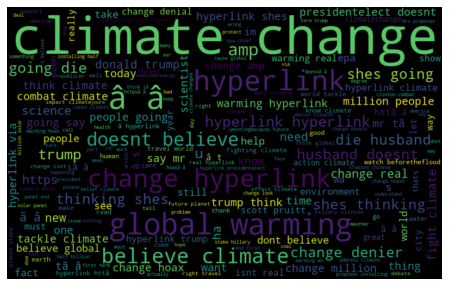

In [55]:
# Visualize frequent words for Class 1
all_words_c1 = " ".join([sentence for sentence in df['clean_tweet_lemma'][df['sentiment']==1]])
wordcloud_c1 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_c1)

# plot the graph
plt.figure(figsize=(8,5))
plt.imshow(wordcloud_c1, interpolation='bilinear')
plt.axis('off')
plt.show()

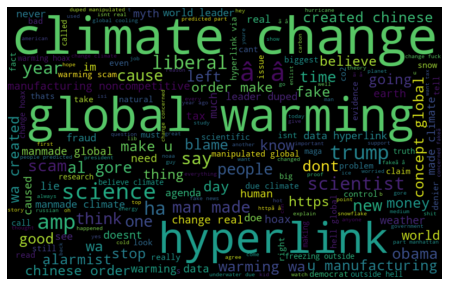

In [56]:
# Visualize frequent words for Class -1
all_words_cm1 = " ".join([sentence for sentence in df['clean_tweet_lemma'][df['sentiment']==-1]])
wordcloud_cm1 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_cm1)

# plot the graph
plt.figure(figsize=(8,5))
plt.imshow(wordcloud_cm1, interpolation='bilinear')
plt.axis('off')
plt.show()

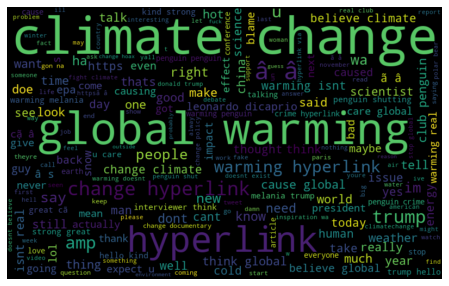

In [57]:
# Visualize frequent words for Class 0
all_words_c0 = " ".join([sentence for sentence in df['clean_tweet_lemma'][df['sentiment']==0]])
wordcloud_c0 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_c0)

# plot the graph
plt.figure(figsize=(8,5))
plt.imshow(wordcloud_c0, interpolation='bilinear')
plt.axis('off')
plt.show()

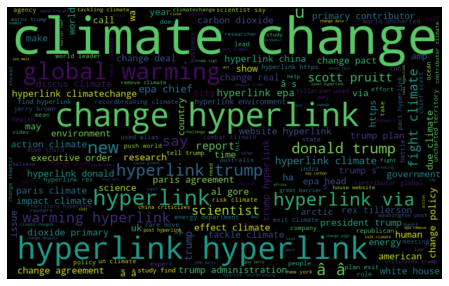

In [58]:
# Visualize frequent words for Class 2
all_words_c2 = " ".join([sentence for sentence in df['clean_tweet_lemma'][df['sentiment']==2]])
wordcloud_c2 = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_c2)

# plot the graph
plt.figure(figsize=(8,5))
plt.imshow(wordcloud_c2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [59]:
def ht_topic_count(tweet):    
    hashtags = []    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    dfhashtag = pd.DataFrame({'hashtag Topic': list(frequency.keys()),
                       'hastag count': list(frequency.values())})
    return dfhashtag.nlargest(15, columns='hastag count')

In [60]:
c_m1 = ht_topic_count(df['message'][df['sentiment'] == -1]) #denier
c0 = ht_topic_count(df['message'][df['sentiment'] == 0]) #neutral
c1 = ht_topic_count(df['message'][df['sentiment'] == 1]) #believer
c2 = ht_topic_count(df['message'][df['sentiment'] == 2]) #news

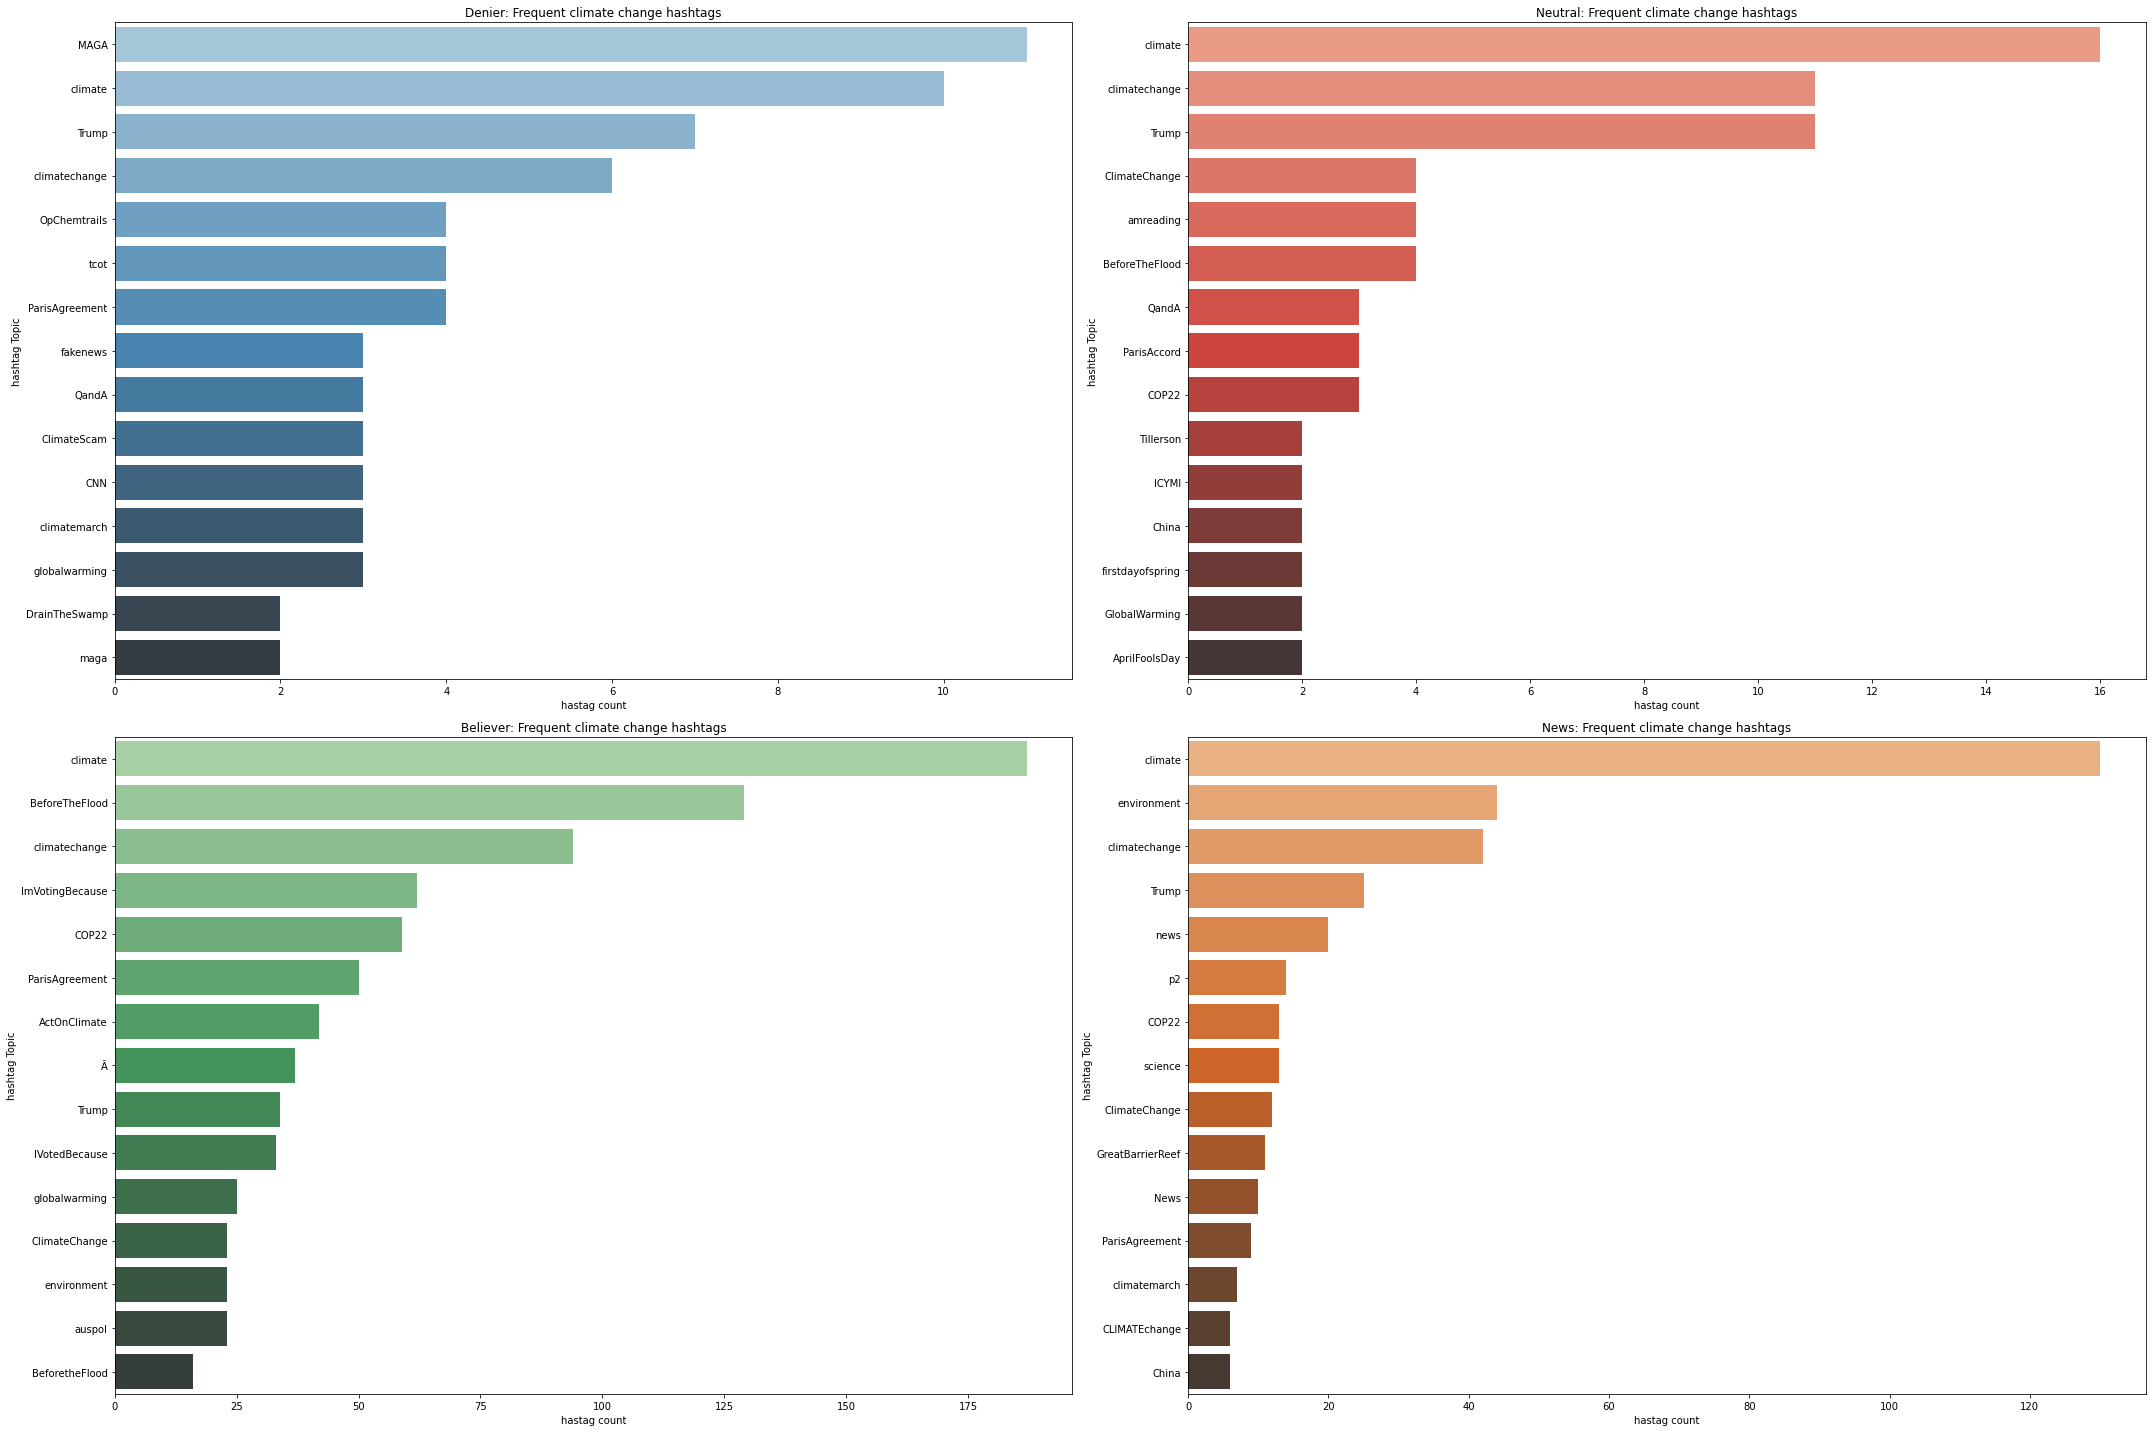

In [61]:
# Plot the frequent hastags for climate change classes
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.barplot(data=c_m1, y=c_m1['hashtag Topic'], x=c_m1['hastag count'], palette=("Blues_d"))
plt.title('Denier: Frequent climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,2)
sns.barplot(data=c0,y=c0['hashtag Topic'], x=c0['hastag count'], palette=("Reds_d"))
plt.title('Neutral: Frequent climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,3)
sns.barplot(data=c1,y=c1['hashtag Topic'], x=c1['hastag count'], palette=("Greens_d"))
plt.title('Believer: Frequent climate change hashtags')
plt.tight_layout()

plt.subplot(2,2,4)
sns.barplot(data=c2,y=c2['hashtag Topic'], x=c2['hastag count'], palette=("Oranges_d"))
plt.title('News: Frequent climate change hashtags')
plt.tight_layout()

In [58]:
df

sentiment  \
0              1   
1              1   
2              2   
3              1   
4              1   
...          ...   
15814          1   
15815          2   
15816          0   
15817         -1   
15818          0   

                                                                                                                                            message  \
0      PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                    It's not like we lack evidence of anthropogenic global warming   
2      RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                               #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                        RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   
...                                                                                                                                             ...   
15814  RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…   
15815                       RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq   
15816         notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2   
15817             RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦   
15818                                        RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ   

       tweetid  \
0       625221   
1       126103   
2       698562   
3       573736   
4       466954   
...        ...   
15814    22001   
15815    17856   
15816   384248   
15817   819732   
15818   806319   

                                                                                                                     clean_tweet  \
0                 polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                                  its not like we lack evidence of anthropogenic global warming   
2                          researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink   
3                                              todayinmaker wired 2016 was a pivotal year in the war on climate change hyperlink   
4                                its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight   
...                                                                                                                          ...   
15814       they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https…   
15815                                         how climate change could be breaking up a 200millionyearold relationship hyperlink   
15816  notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in … hyperlink   
15817              hey liberals the climate change crap is a hoax that ties to agenda2030 the climate is being changed byã¢â‚¬â¦   
15818                                                                cannon s climate change equation in 4 screenshots hyperlink   

                                                                                   clean_tweet_stem  \
0        polyscimajor epa chief doesnt think car

In [59]:
# Remove 'climate change'
words = ['climate', 'change', 'climat', 'chang']
def remove_word(string):
    return [x for x in string.split() if x not in words]

In [60]:
df['clean_tweet_lemma_remove_word'] = df['clean_tweet_lemma'].apply(remove_word)

In [61]:
df['clean_tweet_stem_remove_word'] = df['clean_tweet_stem'].apply(remove_word)

In [62]:
df


sentiment  \
0              1   
1              1   
2              2   
3              1   
4              1   
...          ...   
15814          1   
15815          2   
15816          0   
15817         -1   
15818          0   

                                                                                                                                            message  \
0      PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                    It's not like we lack evidence of anthropogenic global warming   
2      RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                               #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                        RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   
...                                                                                                                                             ...   
15814  RT @ezlusztig: They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://…   
15815                       RT @washingtonpost: How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq   
15816         notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in … https://t.co/0Mp2   
15817             RT @sara8smiles: Hey liberals the climate change crap is a hoax that ties to #Agenda2030.\nThe Climate is Being Changed byÃ¢â‚¬Â¦   
15818                                        RT @Chet_Cannon: .@kurteichenwald's 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ   

       tweetid  \
0       625221   
1       126103   
2       698562   
3       573736   
4       466954   
...        ...   
15814    22001   
15815    17856   
15816   384248   
15817   819732   
15818   806319   

                                                                                                                     clean_tweet  \
0                 polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                                  its not like we lack evidence of anthropogenic global warming   
2                          researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink   
3                                              todayinmaker wired 2016 was a pivotal year in the war on climate change hyperlink   
4                                its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight   
...                                                                                                                          ...   
15814       they took down the material on global warming lgbt rights and health care but now theyre hocking melanias qvc https…   
15815                                         how climate change could be breaking up a 200millionyearold relationship hyperlink   
15816  notiven rt nytimesworld what does trump actually believe about climate change rick perry joins other aides in … hyperlink   
15817              hey liberals the climate change crap is a hoax that ties to agenda2030 the climate is being changed byã¢â‚¬â¦   
15818                                                                cannon s climate change equation in 4 screenshots hyperlink   

                                                                                   clean_tweet_stem  \
0        polyscimajor epa chief doesnt think car

In [63]:
df['clean_tweet_lemma_remove_word'] = df['clean_tweet_lemma_remove_word'].apply(string)

In [64]:
df['clean_tweet_stem_remove_word'] = df['clean_tweet_stem_remove_word'].apply(string)

#### Key Insights

- 


<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Create targets and features dataframes then seperate the test from the train data set.

In [65]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                      clean_tweet  \
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                   its not like we lack evidence of anthropogenic global warming   
2           researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink   
3                               todayinmaker wired 2016 was a pivotal year in the war on climate change hyperlink   
4                 its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight   

                                                                             clean_tweet_stem  \
0  polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait hyperlink via   
1                                                      like lack evid anthropogen global warm   
2                     research say three year act climat chang befor late hyperlink hyperlink   
3                                  todayinmak wire 2016 pivot year war climat chang hyperlink   
4                          2016 racist sexist climat chang deni bigot lead poll electionnight   

                                                                                 clean_tweet_lemma  \
0  polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait hyperlink via   
1                                                  like lack evidence anthropogenic global warming   
2                       researcher say three year act climate change it’s late hyperlink hyperlink   
3                             todayinmaker wired 2016 wa pivotal year war climate change hyperlink   
4                       2016 racist sexist climate change denying bigot leading poll electionnight   

                                                                     clean_tweet_lemma_remove_word  \
0  polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait hyperlink via   
1                                                  like lack evidence anthropogenic global warming   
2                                      researcher say three year act it’s late hyperlink hyperlink   
3                                            todayinmaker wired 2016 wa pivotal year war hyperlink   
4                                      2016 racist sexist denying bigot leading poll electionnight   

                                                                 clean_tweet_stem_remove_word  
0  polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait hyperlink via  
1                                                      like lack evid anthropogen global warm  
2                                  research say three year act befor late hyperlink hyperlink  
3                                         

In [66]:
# feature extraction

vectorizer_dict = {'CV_1': CountVectorizer(ngram_range=(1,1),
                           max_df = 0.8, min_df = 3, 
                           stop_words=None),
                   'CV_2': CountVectorizer(ngram_range=(1,2),
                           max_df = 0.8, min_df = 3, 
                           stop_words=None),
                   'CV_3': CountVectorizer(ngram_range=(1,3),
                           max_df = 0.8, min_df = 3,
                           stop_words=None),
                   'CV_4': CountVectorizer(ngram_range=(1,4),
                           max_df = 0.8, min_df = 3,
                           stop_words=None),
                   }

In [67]:
#vector = CountVectorizer(stop_words=None, ngram_range=(1,1), max_df=0.9, min_df=5, max_features=3000)

In [68]:
#X = vector.fit_transform(df['clean_tweet_stem_remove_word'])
#y = df['sentiment']

In [69]:
#X = vector.fit_transform(df['clean_tweet_lemma_remove_word'])
#y = df['sentiment']

In [70]:
#vector.get_feature_names()

In [71]:
X= df['clean_tweet_stem_remove_word']
y= df['sentiment']

In [72]:
#X.shape

In [73]:
#y.shape

X = our features or independant variables (IVs). These will be used to predict our depedant variable. 

Y = dependant/target variable is also known as the dependent variable (DV) and is the target variable we want to predict.

In [74]:
# split the train data further into train/test data (to perform validation before bringing in the true unseen test data)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This section takes us through the machine learning process. We train and test a number of regression model algorithms and later select the model with the best performance to be used in this project. From the five modeling techniques, we compare the RMSE values of each model as well as the time taken to train and test each model. This will inform our model selection decision.

In [76]:
model_dict = {'Logistic Regression': LogisticRegression(multi_class='ovr'),
              'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42),
              'Random Forest' : RandomForestClassifier(n_estimators=10, random_state=42),
              'Naive Bayes': GaussianNB(), 
              'K Neaarest Neighbours' : KNeighborsClassifier(3),
              'XGBoost': xgb.XGBClassifier(max_depth=6)}

In [ ]:
class_results_dict = defaultdict(list)
for vec_name, vectorizer in vectorizer_dict.items():
    
    X_train_cv = vectorizer.fit_transform(X_train)
    X_test_cv  = vectorizer.transform(X_test)
    for mod_name, model in model_dict.items():
        model.fit(X_train_cv.toarray() , y_train);
        y_pred_cv = model.predict(X_test_cv.toarray())
        precision_weighted = precision_score(y_test, y_pred_cv, average='weighted')
        recall_weighted = recall_score(y_test, y_pred_cv, average='weighted')
        f1_weighted = f1_score(y_test, y_pred_cv,average='weighted')
        
        precision_macro = precision_score(y_test, y_pred_cv, average='macro')
        recall_macro = recall_score(y_test, y_pred_cv, average='macro')
        f1_macro = f1_score(y_test, y_pred_cv,average='macro')
        
        class_results_dict['Vectorizer Type'].append(vec_name)
        class_results_dict['Model Name'].append(mod_name)
        class_results_dict['Precision'].append(precision_weighted)
        class_results_dict['Recall'].append(recall_weighted)
        class_results_dict['F1-score'].append(f1_weighted)
        
        class_results_dict['Precision Macro'].append(precision_macro)
        class_results_dict['Recall Macro'].append(recall_macro)
        class_results_dict['F1-score Macro'].append(f1_macro)
        
        
class_results_df = pd.DataFrame(class_results_dict)

[11:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
class_results_df

Vectorizer Type             Model Name  Precision    Recall  F1-score  \
0             CV_1    Logistic Regression   0.721676  0.727560  0.718179   
1             CV_1          Decision Tree   0.641147  0.604298  0.526005   
2             CV_1          Random Forest   0.693154  0.694058  0.689236   
3             CV_1            Naive Bayes   0.587994  0.396018  0.419903   
4             CV_1  K Neaarest Neighbours   0.706792  0.445954  0.480257   
5             CV_1                XGBoost   0.719788  0.717446  0.696418   
6             CV_2    Logistic Regression   0.723495  0.730405  0.721892   
7             CV_2          Decision Tree   0.644443  0.604614  0.525083   
8             CV_2          Random Forest   0.678479  0.679836  0.674505   
9             CV_2            Naive Bayes   0.628942  0.557206  0.575295   
10            CV_2  K Neaarest Neighbours   0.695772  0.428255  0.458397   
11            CV_2                XGBoost   0.720388  0.714918  0.694441   
12            CV_3    Logistic Regression   0.725460  0.731669  0.723537   
13            CV_3          Decision Tree   0.644443  0.604614  0.525083   
14            CV_3          Random Forest   0.678862  0.678571  0.673007   
15            CV_3            Naive Bayes   0.631172  0.564475  0.580960   
16            CV_3  K Neaarest Neighbours   0.694299  0.426043  0.456072   
17            CV_3                XGBoost   0.722971  0.718710  0.697662   
18            CV_4    Logistic Regression   0.725219  0.731353  0.723390   
19            CV_4          Decision Tree   0.635089  0.604298  0.524917   
20            CV_4          Random Forest   0.677801  0.676359  0.671137   
21            CV_4            Naive Bayes   0.632256  0.566688  0.583012   
22            CV_4  K Neaarest Neighbours   0.692699  0.425095  0.454501   
23            CV_4                XGBoost   0.722176  0.718394  0.696890   

    Precision Macro  Recall Macro  F1-score Macro  
0          0.698055      0.609697        0.638738  
1          0.690717      0.361562        0.355259  
2          0.647165      0.586509        0.605252  
3          0.426734      0.466890        0.381560  
4          0.548110      0.476571        0.421280  
5          0.734068      0.565973        0.610144  
6          0.694988      0.617474        0.645320  
7          0.696753      0.360191        0.355712  
8          0.635080      0.571024        0.591296  
9          0.490703      0.547473        0.500150  
10         0.540179      0.467495        0.407906  
11         0.741466      0.563777        0.609737  
12         0.698618      0.620071        0.648264  
13         0.696753      0.360191        0.355712  
14         0.628392      0.561430        0.580931  
15         0.494841      0.551945        0.505711  
16         0.541516      0.467138        0.407463  
17         0.741362      0.565909        0.611022  
18         0.697802      0.620321        0.648320  
19         0.680806      0.360045        0.355624  
20         0.624646      0.559229        0.578156  
21         0.496027      0.552340        0.507082  
22         0.541574      0.467320        0.406978  
23         0.740018      0.566006        0.610884

#### Model 1 - Logistic Regression

In [ ]:
# Training
#lr = LogisticRegression(multi_class='ovr')
#lr.fit(X_trainf, y_trainf)

#### Model 2 - Decision Tree Classifier

In [ ]:
# Training
#tree = DecisionTreeClassifier(random_state=42)
#tree.fit(X_trainf, y_trainf)

#### Model 3 _Random Forest

In [ ]:
# Training
#forest = RandomForestClassifier(n_estimators=100, random_state=42)
#forest.fit(X_trainf, y_trainf)

#### Model 4 - Naive Bayes

In [ ]:
# Training 
#naive_bayes = GaussianNB()
#naive_bayes.fit(X_trainf.toarray(), y_trainf)

#### Model 5 - K Nearest Neighbours

In [ ]:
# Training
#n_neighbors = 3
#knn = KNeighborsClassifier(n_neighbors) 
#knn.fit(X_trainf, y_trainf)

#### Model 6 - XGBoost

In [ ]:
#xgb = xgb.XGBClassifier()

In [ ]:
#xgb.fit(X_trainf, y_trainf)

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
#def lr_pred(X_test):
#    lr_pred = lr.predict(X_test)
#    print('Classification Report - Logistic Regression Full Model')
#    print(classification_report(y_testf, lr_pred))
#    return lr_pred

In [ ]:
#lr_pred(X_testf)

In [ ]:
""""
def tree_pred(X_test):
    tree_pred = tree.predict(X_test)
    print('Classification Report - Decision Tree Full Model')
    print(classification_report(y_testf, tree_pred))
    return tree_pred
""""

In [ ]:
#tree_pred(X_testf)

In [ ]:
""""
def forest_pred(X_test):
    forest_pred = forest.predict(X_test)
    print('Classification Report - Random Forest Full Model')
    print(classification_report(y_testf, forest_pred))
    return forest_pred
""""

In [ ]:
#forest_pred(X_testf)

In [ ]:
""""
def naive_bayes_pred(X_test):
    naive_bayes_pred = naive_bayes.predict(X_test.toarray())
    print('Classification Report - Naive Bayes Full Model')
    print(classification_report(y_testf, naive_bayes_pred))
    return naive_bayes_pred
""""

In [ ]:
#naive_bayes_pred(X_testf)

In [ ]:
""""
def knn_pred(X_test):
    knn_pred = knn.predict(X_test)
    print('Classification Report - K Nearest Neighbours Full Model')
    print(classification_report(y_testf, knn_pred))
    return knn_pred
""""

In [ ]:
#knn_pred(X_testf)

In [ ]:
""""
def xgb_pred(X_test):
    xgb_pred = xgb.predict(X_test)
    print('Classification Report - Extreme Gradient Boost Full Model')
    print(classification_report(y_testf, xgb_pred))
    return xgb_pred
    
""""

In [ ]:
#xgb_pred(X_testf)

<a id="eight"></a>
## 8. Model Tuning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Resampling

In [ ]:
# Plot posts Class
df['sentiment'].value_counts().plot(kind = 'bar')
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Pick a class size of roughly half the size of the largest size
class_size = 7000

In [ ]:
# Downsample classes with more than 5000 observations
pro_downsampled = resample(df[df['sentiment']==1],
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

In [ ]:
# Upsample classes with less than 5000 observations
neutral_upsampled = resample(df[df['sentiment']==0],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

In [ ]:
# Upsample classes with less than 5000 observations
anti_upsampled = resample(df[df['sentiment']==-1],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

In [ ]:
# Upsample classes with less than 5000 observations
news_upsampled = resample(df[df['sentiment']==2],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

In [ ]:
# Combine sampled classes with majority class
sampled = pd.concat([pro_downsampled, neutral_upsampled, anti_upsampled, news_upsampled])

# Check new class counts
sampled['sentiment'].value_counts()

In [ ]:
sampled 

In [ ]:
X_resampled = vector.fit_transform(sampled['clean_tweet_stem_remove_word'].values.astype(str))

In [ ]:
X_resampled = X_resampled.toarray()

In [ ]:
y_resampled = sampled['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27)

#### Feature Selection

In [ ]:
### 1 - Variance Thresholding

#selector = VarianceThreshold(0.2)

# Transform (i.e.: run selection on) the training data
#X_train_best = selector.fit_transform(X_train)
#X_test_best = selector.transform(X_test)

In [ ]:
### 2 - K Best

#Set up selector, choosing score function and number of features to retain
#selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=20)

In [ ]:
# Transform (i.e.: run selection on) the training data
#X_train_best = selector_kbest.fit_transform(X_train, y_train)
#X_test_best = selector_kbest.transform(X_test)

#### Retraining

In [ ]:
# Training
lm_best = LogisticRegression(multi_class='ovr')
lm_best.fit(X_train_best, y_train)

In [ ]:
pred_lr_best = lm_best.predict(X_test_best)

In [ ]:
print('Classification Report - Logictic Regression Best')
print(classification_report(y_test, pred_lr_best))

lr_pred(X_testf)

In [ ]:
# Training
tree_best = DecisionTreeClassifier(random_state=42)
tree_best.fit(X_train_best, y_train)

In [ ]:
pred_tree_best = tree_best.predict(X_test_best)

In [ ]:
print('Classification Report - Decision Tree Best')
print(classification_report(y_test, pred_tree_best))

tree_pred(X_testf)

In [ ]:
forest_best = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
forest_best.fit(X_train_best, y_train)

In [ ]:
pred_forest_best = forest_best.predict(X_test_best)

In [ ]:
print('Classification Report - Random Forest Best')
print(classification_report(y_test, pred_forest_best))

forest_pred(X_testf)

In [ ]:
naive_bayes_best = GaussianNB()

In [ ]:
naive_bayes_best.fit(X_train_best, y_train)

In [ ]:
pred_naive_bayes_best = naive_bayes_best.predict(X_test_best)

In [ ]:
print('Classification Report Naive Bayes Best')
print(classification_report(y_test, pred_naive_bayes_best))

naive_bayes_pred(X_testf)

In [ ]:
n_neighbors = 3
knn_best = KNeighborsClassifier(n_neighbors) 

In [ ]:
knn_best.fit(X_train_best, y_train)

In [ ]:
pred_knn_best = knn_best.predict(X_test_best)

In [ ]:
print('Classification Report - K Nearest Neighbours Best')
print(classification_report(y_test, pred_knn_best))

knn_pred(X_testf)

In [ ]:
#xgb_best = xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train_best, y_train)

In [ ]:
pred_xgb_best = xgb.predict(X_test_best)

In [ ]:
print('Classification Report - XGB Best')
print(classification_report(y_test, pred_xgb_best))

#xgb_pred(X_testf)

<a id="nine"></a>
## 9. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



##### Mystery Classifier

This section discusses the inner workings of the best performing model in a simple way.

## Conclusion

#### Kaggle submission file
This section creates the Kaggle submission file in csv format.

In [ ]:
sampled.head()

In [80]:
df.head()

sentiment  \
0          1   
1          1   
2          2   
3          1   
4          1   

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1                                                                                It's not like we lack evidence of anthropogenic global warming   
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3                                           #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD   
4                    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight   

   tweetid  \
0   625221   
1   126103   
2   698562   
3   573736   
4   466954   

                                                                                                      clean_tweet  \
0  polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what hyperlink via   
1                                                   its not like we lack evidence of anthropogenic global warming   
2           researchers say we have three years to act on climate change before it’s too late hyperlink hyperlink   
3                               todayinmaker wired 2016 was a pivotal year in the war on climate change hyperlink   
4                 its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight   

                                                                             clean_tweet_stem  \
0  polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait hyperlink via   
1                                                      like lack evid anthropogen global warm   
2                     research say three year act climat chang befor late hyperlink hyperlink   
3                                  todayinmak wire 2016 pivot year war climat chang hyperlink   
4                          2016 racist sexist climat chang deni bigot lead poll electionnight   

                                                                                 clean_tweet_lemma  \
0  polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait hyperlink via   
1                                                  like lack evidence anthropogenic global warming   
2                       researcher say three year act climate change it’s late hyperlink hyperlink   
3                             todayinmaker wired 2016 wa pivotal year war climate change hyperlink   
4                       2016 racist sexist climate change denying bigot leading poll electionnight   

                                                                     clean_tweet_lemma_remove_word  \
0  polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait hyperlink via   
1                                                  like lack evidence anthropogenic global warming   
2                                      researcher say three year act it’s late hyperlink hyperlink   
3                                            todayinmaker wired 2016 wa pivotal year war hyperlink   
4                                      2016 racist sexist denying bigot leading poll electionnight   

                                                                 clean_tweet_stem_remove_word  
0  polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait hyperlink via  
1                                                      like lack evid anthropogen global warm  
2                                  research say three year act befor late hyperlink hyperlink  
3                                         

In [81]:
df_test.head()

message  \
0                    Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq   
1         Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj   
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4                                                             RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican   

   tweetid  
0   169760  
1    35326  
2   224985  
3   476263  
4   872928

In [100]:
vector = list(vectorizer_dict.values())[2]
vector

CountVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 3))

In [101]:
vector = CountVectorizer(max_df=0.8, min_df=3, ngram_range=(1, 3), max_features=10000)
vector

CountVectorizer(max_df=0.8, max_features=10000, min_df=3, ngram_range=(1, 3))

In [102]:
x_final = vector.fit_transform(df['clean_tweet_lemma_remove_word'])
x_test_final = vector.fit_transform(df_test['message'])
y = df['sentiment']

In [103]:
x_final.shape

(15819, 10000)

In [104]:
x_test_final.shape

(10546, 10000)

In [86]:
#x_final = selector.fit_transform(x_final)
#x_test_final = selector.transform(x_test_final)

In [ ]:
# Training
#tree_final = DecisionTreeClassifier(random_state=42)

In [ ]:
#tree_final.fit(x_final, y)

In [ ]:
#predict_final = tree_final.predict(x_test_final)

In [105]:
lr_final = LogisticRegression(multi_class='ovr')

In [106]:
lr_final.fit(x_final, y)

LogisticRegression(multi_class='ovr')

In [107]:
predict_final = lr_final.predict(x_test_final)

In [108]:
daf = pd.DataFrame(predict_final, columns=['sentiment'])
daf.head(20)

sentiment
0           1
1           1
2          -1
3           1
4           1
5           1
6           0
7           0
8           2
9           1
10          1
11          1
12          2
13          1
14          1
15          1
16          1
17          1
18          1
19          1

In [109]:
df_test_final = pd.read_csv('test_with_no_labels.csv')

In [110]:
df_test_final.head()

message  \
0                    Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq   
1         Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj   
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4                                                             RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican   

   tweetid  
0   169760  
1    35326  
2   224985  
3   476263  
4   872928

In [111]:
output = pd.DataFrame({"TweetID":df_test_final['tweetid']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

In [112]:
submission

TweetID  sentiment
0       169760          1
1        35326          1
2       224985         -1
3       476263          1
4       872928          1
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          1
10544   867455          2
10545   470892          1

[10546 rows x 2 columns]